<a href="https://colab.research.google.com/github/AMMLRepos/Data-Analysis-120-years-of-olympic-history/blob/main/data_analysis_120_years_of_olympic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('data-analysis-120-years-of-olympic')
jovian.set_colab_id('1HOuo72qgRdDcUkVPtprahYoZeCrU8Hcv')

# Overview
This nootebook is an exercise to analyse the Olympic dataset which is openly avaailable on [Kaggle](https://www.kaggle.com/mysarahmadbhat/120-years-of-olympic-history/). We have following objectives with this activity -
- Get some interesting insights on the data we have available, like say person who won most number of golds in olympic history, number of countries participated each year and what not. 
- Learning purpose - Use pandas, matplotlib and seaborn libraries to analyse the data and provide us an interesting use case to apply these skills

#Major Steps 
We will perform following major steps -
- Setup your wokring environment - Download libraries like pandas, numpy, matplotlib, seaborn
- Download the data from [Kaggle](https://www.kaggle.com/mysarahmadbhat/120-years-of-olympic-history/) using [opendatasets](https://github.com/JovianML/opendatasets) library which is developed by [jovian](https://jovian.ai)
- Perform basic analysis and draw seaborn plots 
- Summarize your statistics 
- Optional - Expose your insights on a webpage 

Use the "Run" button to execute the code.

# Step 1 - Setup our working environment 

Please note that this notebook is saved in jovian's environment and hence have some setup involved for jovian. If you are not running and saving it in jovian environment, you might not need a few of the steps involving jovian

In [2]:
!pip install jovian pandas numpy matplotlib opendatasets seaborn  --quiet

In [3]:
#Only needed if you are using jovian environment
import jovian 

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="data-analysis-120-years-of-olympic")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aaryaashay1848/data-analysis-120-years-of-olympic


'https://jovian.ai/aaryaashay1848/data-analysis-120-years-of-olympic'

In [5]:
#Import required libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

setup basic configuration for notebook and seaborn plots

In [6]:
#Ensures that matplotlib and seaborn graphs are visible within notebook
%matplotlib inline 

#Setup up style and theming for seaborn graphs 
sns.set_theme(style="darkgrid")
sns.set_context("paper")
plt.figure(figsize=(8,6))

#Ensures that you see all (500) columns within notebook
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<Figure size 576x432 with 0 Axes>

#Step 2 - Download data
Download dataset using opendatasets library of jovian

In [7]:
import opendatasets as od
dataset_url = "https://www.kaggle.com/mysarahmadbhat/120-years-of-olympic-history/"

#This will prompt to ask for your Kaggle username and access key. Please provide as an input
#If not, you can download your kaggle.json from kaggle and upload it in same working directory of this notebook
#It will then pick your credentials from kaggle.json
#I will manually provide those inputs
od.download(dataset_url)

Skipping, found downloaded files in "./120-years-of-olympic-history" (use force=True to force download)


Your dataset is downloaded in a special directory named "120-years-of-olympic-history". Let us use os module to work on directories and get list of files which are downloaded


In [8]:
import os 
datadir = "./120-years-of-olympic-history"

data_files = os.listdir(datadir)
print("List of downloaded files - ", data_files)

List of downloaded files -  ['country_definitions_data_dictionary.csv', 'country_definitions.csv', 'athlete_events_data_dictionary.csv', 'athlete_events.csv']


We have four files in each. It is a good practice to view files in excel to have a quick look at the data you are deadling with, but we will use pandas also to do that. Let us import all 4 files in our pandas dataframe

In [9]:
#Create file paths for all files present in the directory
file_country_definition_data_dictionary = datadir + "/" + data_files[0]
file_country_definition = datadir + "/" + data_files[1]
file_athelete_events_data_dictionary = datadir + "/" + data_files[2]
file_athelete_events = datadir + "/" + data_files[3]

Let us now import data into our dataframe and see if they are important for our analysis or are just helping data dictionary to understand manual data

In [10]:
country_definition_data_dictionary_df = pd.read_csv(file_country_definition_data_dictionary)
print("Dataframe for Country Definition data dictionary file")
print(country_definition_data_dictionary_df)

Dataframe for Country Definition data dictionary file
    Field                                        Description
0     NOC           National Olympic Committee 3 letter code
1  region           Country name used for geospatial mapping
2   notes  Real country name if "region" isn't an exact m...


The above output looks like this is just a helping file with mapping dictionaries for data in some other file. For time being we might not need this and we can refer it in an excel seperately if needed. 
Let us do that for all other remaining files 

In [11]:
country_definition_df = pd.read_csv(file_country_definition)
print("Dataframe for Country Definition file")
print(country_definition_df)

Dataframe for Country Definition file
     NOC       region                 notes
0    AFG  Afghanistan                   NaN
1    AHO      Curacao  Netherlands Antilles
2    ALB      Albania                   NaN
3    ALG      Algeria                   NaN
4    AND      Andorra                   NaN
..   ...          ...                   ...
225  YEM        Yemen                   NaN
226  YMD        Yemen           South Yemen
227  YUG       Serbia            Yugoslavia
228  ZAM       Zambia                   NaN
229  ZIM     Zimbabwe                   NaN

[230 rows x 3 columns]


The above dataframe is a list of coutries with country code and name of country. If you observe columns of our values of our first dataset file are used as columns in our second file 

In [12]:
athelete_definition_data_dictionary_df = pd.read_csv(file_athelete_events_data_dictionary)
print("Dataframe for Athelete events data dictionary file")
print(athelete_definition_data_dictionary_df)

Dataframe for Athelete events data dictionary file
     Field                               Description
0       ID            Unique number for each athlete
1     Name                            Athlete's name
2      Sex                    Male (M) or Female (F)
3      Age                                   Integer
4   Height                            In centimeters
5   Weight                              In kilograms
6     Team                                 Team name
7      NOC  National Olympic Committee 3-letter code
8    Games                           Year and season
9     Year                                   Integer
10  Season                          Summer or Winter
11    City                                 Host city
12   Sport                                     Sport
13   Event                                     Event
14   Medal               Gold, Silver, Bronze, or NA


This is again the metadata but an important one which is giving us details of all the columns which we will get to see in our main datafile. Let us know do the important job of importing last and critical data file

In [13]:
athelete_events_df = pd.read_csv(file_athelete_events)
print("Dataframe for Athelete events file")
print(athelete_events_df)

Dataframe for Athelete events file
            ID                      Name Sex   Age  Height  Weight            Team  NOC        Games  Year  Season            City          Sport                                     Event Medal
0            1                 A Dijiang   M  24.0   180.0    80.0           China  CHN  1992 Summer  1992  Summer       Barcelona     Basketball               Basketball Men's Basketball   NaN
1            2                  A Lamusi   M  23.0   170.0    60.0           China  CHN  2012 Summer  2012  Summer          London           Judo              Judo Men's Extra-Lightweight   NaN
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark  DEN  1920 Summer  1920  Summer       Antwerpen       Football                   Football Men's Football   NaN
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris     Tug-Of-War               Tug-Of-War Men's Tug-Of-War  

#Step 3 - Working on basic data analysis 
Now that we have our data imported in dataframe, lets observe our data and perform basic analysis on the meta information of the data 

## Let us print our dataframe 

In [14]:
print(athelete_events_df)

            ID                      Name Sex   Age  Height  Weight            Team  NOC        Games  Year  Season            City          Sport                                     Event Medal
0            1                 A Dijiang   M  24.0   180.0    80.0           China  CHN  1992 Summer  1992  Summer       Barcelona     Basketball               Basketball Men's Basketball   NaN
1            2                  A Lamusi   M  23.0   170.0    60.0           China  CHN  2012 Summer  2012  Summer          London           Judo              Judo Men's Extra-Lightweight   NaN
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark  DEN  1920 Summer  1920  Summer       Antwerpen       Football                   Football Men's Football   NaN
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris     Tug-Of-War               Tug-Of-War Men's Tug-Of-War  Gold
4            5  Christine Jaco

## Get the list of columns we have in our dataframe

In [15]:
print(athelete_events_df.columns)

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'], dtype='object')


As saved in our athelete data dictionary file, we have following columns and their explaination

In [16]:
print(athelete_definition_data_dictionary_df)

     Field                               Description
0       ID            Unique number for each athlete
1     Name                            Athlete's name
2      Sex                    Male (M) or Female (F)
3      Age                                   Integer
4   Height                            In centimeters
5   Weight                              In kilograms
6     Team                                 Team name
7      NOC  National Olympic Committee 3-letter code
8    Games                           Year and season
9     Year                                   Integer
10  Season                          Summer or Winter
11    City                                 Host city
12   Sport                                     Sport
13   Event                                     Event
14   Medal               Gold, Silver, Bronze, or NA


## Get basic information on the dataframe 

In [17]:
print(athelete_events_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None


AS shown above we can get following insights from the dataframe 
- We have 271116 records in total
- Size of dataframe - 31 MB 
- Majority of columns in our dataframe has no missing values. We can see Age, Height, Weight, and Medal having missing or NAN values# 


## Get basic statistics on the numerical columns of the dataframe

In [18]:
print(athelete_events_df.describe())

                  ID            Age         Height         Weight           Year
count  271116.000000  261642.000000  210945.000000  208241.000000  271116.000000
mean    68248.954396      25.556898     175.338970      70.702393    1978.378480
std     39022.286345       6.393561      10.518462      14.348020      29.877632
min         1.000000      10.000000     127.000000      25.000000    1896.000000
25%     34643.000000      21.000000     168.000000      60.000000    1960.000000
50%     68205.000000      24.000000     175.000000      70.000000    1988.000000
75%    102097.250000      28.000000     183.000000      79.000000    2002.000000
max    135571.000000      97.000000     226.000000     214.000000    2016.000000


Based on the above outcome we have following stats - 
- Average age of an athelete is 25.5 years 
- **Min age of an athelete is 10 years - Wow! I never thought that an athelete of 10 years also participated in olympics. We will find more about it later **
- **Max age of an athelete is 97 years - Another surprise. It this really the right data ?**
- 75% of atheletes had age around 28 years 


We have similiar interesting insights on height and weight as well and two to highlight are - 
- Max weight of an athelete in our data is 214 KG
- Min weight of an athelete in our data is 25 KG 

**We already got a few interesting insights on age and height**. Let us go ahead and ask more questions to this data

#Let us question our data

## How many males and females appeared in Olympics ?

In [19]:
males_count = athelete_events_df[athelete_events_df["Sex"] == "M"]["Sex"].count()
females_count = athelete_events_df[athelete_events_df["Sex"] == "F"]["Sex"].count()

print("Number of males - ", males_count)
print("Number of females - ", females_count)

Number of males -  196594
Number of females -  74522


In [21]:
percent_of_males = males_count / (males_count + females_count)
percent_of_females = females_count / (males_count + females_count)

print("Males % - ", percent_of_males)
print("Females % - ", percent_of_females)

Males % -  0.7251287271868868
Females % -  0.2748712728131132


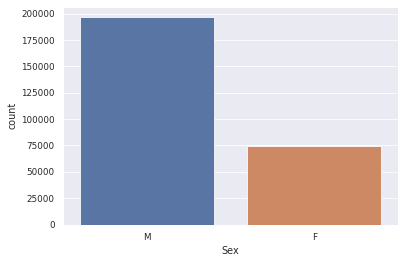

In [20]:
#Let us plot a graph
sns.countplot(x = 'Sex', data = athelete_events_df);

As shown above we have 196,594 males and 74,522 females in our olympics dataset and there is a count plot showing the same. 

## Which athelete appeared in Olympics for most of the time ?

In [33]:
#Get the count of each athelete in our dataframe
athelete_events_df['Name'].value_counts()

Robert Tait McKenzie            58
Heikki Ilmari Savolainen        39
Joseph "Josy" Stoffel           38
Ioannis Theofilakis             36
Takashi Ono                     33
                                ..
Tatyana Vasilyevna Kalmykova     1
Mariya Lvovna Kalmykova          1
Christine Kalmer                 1
Joannis "Jannis" Kalmazidis      1
Pierre-Georges LeClercq          1
Name: Name, Length: 134732, dtype: int64

In [39]:
#Get the max count from our previous records 
max_appearances = athelete_events_df["Name"].value_counts().max();
print("Maximum number of appearences - ", max_appearances)

Maximum number of appearences -  58


We can copy the name of the athelete and use it in the below form to get details of that specific athelete who appeared for max number of times 

In [51]:
# Get the details of an athelete who appeared most number of times 
athelete_events_df[athelete_events_df["Name"] == "Robert Tait McKenzie"]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
154798,77710,Robert Tait McKenzie,M,44.0,NaN,NaN,Canada,CAN,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Sculpturing,NaN
154799,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154800,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154801,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154802,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154803,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154804,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154805,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154806,77710,Robert Tait McKenzie,M,65.0,NaN,NaN,Canada,CAN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Medals And...",Bronze
154807,77710,Robert Tait McKenzie,M,65.0,NaN,NaN,Canada,CAN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN


If we don't want to manually copy athelete's name we have to do something as shown below 

In [56]:
max_appearances = athelete_events_df["Name"].value_counts()
#Get the index of the series we got as an outcome 
series_indexes = max_appearances.index
print(series_indexes)

Index(['Robert Tait McKenzie', 'Heikki Ilmari Savolainen', 'Joseph "Josy" Stoffel', 'Ioannis Theofilakis', 'Takashi Ono', 'Andreas Wecker', 'Alexandros Theofilakis', 'Alfrd (Arnold-) Hajs (Guttmann-)', 'Jean Lucien Nicolas Jacoby', 'Michel Mathiot',
       ...
       'Margit Kalocsai (Krammer)', 'Sndor Kal', 'Juris Kalni', 'Alfrds Kalni', 'Pavla Kaln', 'Tatyana Vasilyevna Kalmykova', 'Mariya Lvovna Kalmykova', 'Christine Kalmer', 'Joannis "Jannis" Kalmazidis', 'Pierre-Georges LeClercq'], dtype='object', length=134732)


In [59]:
#You can now get first element of the Series as we know the max is shown at the top in our response 
athelete_name = series_indexes[0]
print("Name of athelete who appeared for maximum {} times is {}".format(max_appearances.max(), athelete_name))

Name of athelete who appeared for maximum 58 times is Robert Tait McKenzie


In [60]:
#Let us know get all records for this athelete 
athelete_events_df[athelete_events_df["Name"] == athelete_name]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
154798,77710,Robert Tait McKenzie,M,44.0,NaN,NaN,Canada,CAN,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Sculpturing,NaN
154799,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154800,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154801,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154802,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154803,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154804,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154805,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154806,77710,Robert Tait McKenzie,M,65.0,NaN,NaN,Canada,CAN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Medals And...",Bronze
154807,77710,Robert Tait McKenzie,M,65.0,NaN,NaN,Canada,CAN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN


## Which country won most number of medals in the history of olympics ?
Let us calculate -
- Country with max gold medals 
- Country with max solver medals 
- Country with max bronze medals 
- Country with max total medals

In [61]:
print(athelete_events_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None


In [77]:
#Get the medal count for each country 
unique_list_of_countries = athelete_events_df["Team"].unique()
print("Unique list of coutries - ", unique_list_of_countries)
print("Length of countries - ", len(unique_list_of_countries))

Unique list of coutries -  ['China' 'Denmark' 'Denmark/Sweden' ... 'Solos Carex' 'Dow Jones' 'Digby']
Length of countries -  1184


The outcome above does not look unique as we dont have this many numbe rof countries in the world. That means we cannot rely on this column for count.Let us see any other column which can get us this count 

In [83]:
#Get the medal count for each country 
unique_list_of_countries = athelete_events_df["NOC"].unique()

print("Unique list of coutries (NOC) - \n\n", unique_list_of_countries)
print("")
print("Length of countries(NOC) - ", len(unique_list_of_countries))

Unique list of coutries (NOC) - 

 ['CHN' 'DEN' 'NED' 'USA' 'FIN' 'NOR' 'ROU' 'EST' 'FRA' 'MAR' 'ESP' 'EGY'
 'IRI' 'BUL' 'ITA' 'CHA' 'AZE' 'SUD' 'RUS' 'ARG' 'CUB' 'BLR' 'GRE' 'CMR'
 'TUR' 'CHI' 'MEX' 'URS' 'NCA' 'HUN' 'NGR' 'ALG' 'KUW' 'BRN' 'PAK' 'IRQ'
 'UAR' 'LIB' 'QAT' 'MAS' 'GER' 'CAN' 'IRL' 'AUS' 'RSA' 'ERI' 'TAN' 'JOR'
 'TUN' 'LBA' 'BEL' 'DJI' 'PLE' 'COM' 'KAZ' 'BRU' 'IND' 'KSA' 'SYR' 'MDV'
 'ETH' 'UAE' 'YAR' 'INA' 'PHI' 'SGP' 'UZB' 'KGZ' 'TJK' 'EUN' 'JPN' 'CGO'
 'SUI' 'BRA' 'FRG' 'GDR' 'MON' 'ISR' 'URU' 'SWE' 'ISV' 'SRI' 'ARM' 'CIV'
 'KEN' 'BEN' 'UKR' 'GBR' 'GHA' 'SOM' 'LAT' 'NIG' 'MLI' 'AFG' 'POL' 'CRC'
 'PAN' 'GEO' 'SLO' 'CRO' 'GUY' 'NZL' 'POR' 'PAR' 'ANG' 'VEN' 'COL' 'BAN'
 'PER' 'ESA' 'PUR' 'UGA' 'HON' 'ECU' 'TKM' 'MRI' 'SEY' 'TCH' 'LUX' 'MTN'
 'CZE' 'SKN' 'TTO' 'DOM' 'VIN' 'JAM' 'LBR' 'SUR' 'NEP' 'MGL' 'AUT' 'PLW'
 'LTU' 'TOG' 'NAM' 'AHO' 'ISL' 'ASA' 'SAM' 'RWA' 'DMA' 'HAI' 'MLT' 'CYP'
 'GUI' 'BIZ' 'YMD' 'KOR' 'THA' 'BER' 'ANZ' 'SCG' 'SLE' 'PNG' 'YEM' 'IOA'
 'OMA' 'FIJ' 'VA

The above outcome looks good as we practically have 230 countries in the world

Let us try to get gold, silver and bronze count for one country

In [167]:
chinese_medal_count = athelete_events_df[athelete_events_df["NOC"] == "CHN"]

gold = chinese_medal_count["Medal"].value_counts()["Gold"]
silver = chinese_medal_count["Medal"].value_counts()["Silver"]
bronze = chinese_medal_count["Medal"].value_counts()["Bronze"]
print(gold, silver, bronze)

350 347 292


Let us apply this logic for all countries in the list 

In [168]:
medal_count_list = []

for country in unique_list_of_countries:
  gold = silver = bronze = 0
  medal_count = athelete_events_df[athelete_events_df["NOC"] == country]
  
  try:
    gold = medal_count["Medal"].value_counts()["Gold"]
  except KeyError:
    gold = 0
  
  try:
    silver = medal_count["Medal"].value_counts()["Silver"]
  except KeyError:
    silver = 0
  
  try:
    bronze = medal_count["Medal"].value_counts()["Bronze"]
  except KeyError:
    bronze = 0

  medal_dict = {}
  medal_dict = {
      "Country": country,
      "Gold": gold,
      "Silver": silver,
      "Bronze": bronze, 
      "Total" : gold + silver + bronze
      }
  #print(country_medal_df)
  medal_count_list.append(medal_dict)
  
  #df1.append(df2)

In [169]:
medal_count_df = pd.DataFrame(medal_count_list)
print(medal_count_df)

    Country  Gold  Silver  Bronze  Total
0       CHN   350     347     292    989
1       DEN   179     241     177    597
2       NED   287     340     413   1040
3       USA  2638    1641    1358   5637
4       FIN   198     270     432    900
..      ...   ...     ...     ...    ...
225     TUV     0       0       0      0
226     NFL     0       0       0      0
227     KOS     1       0       0      1
228     SSD     0       0       0      0
229     LES     0       0       0      0

[230 rows x 5 columns]


Let us know count the country with max number of gold medals and plot a graph of top 10 countries with gold medals 

In [170]:
max_gold_index = medal_count_df["Gold"].idxmax()
print("Country with Max Gold - ", medal_count_df.loc[max_gold_index]["Country"])
print("Number of Gold medals won - ", medal_count_df.loc[max_gold_index]["Gold"])

Country with Max Gold -  USA
Number of Gold medals won -  2638


Below is the bar graph to show the gold medal count for top 10 countries 

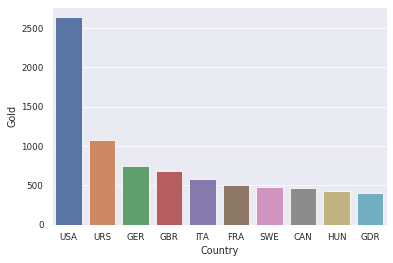

In [171]:
medal_count_df.sort_values("Gold", axis = 0, ascending = False, inplace = True)
sns.barplot(x = "Country", y = "Gold", data = medal_count_df.head(10));

Let us know count the country with max number of silver medals and plot a graph of top 10 countries with max silver medals 

In [172]:
max_gold_index = medal_count_df["Silver"].idxmax()
print("Country with Max Silver - ", medal_count_df.loc[max_gold_index]["Country"])
print("Number of Silver medals won - ", medal_count_df.loc[max_gold_index]["Silver"])

Country with Max Silver -  USA
Number of Silver medals won -  1641


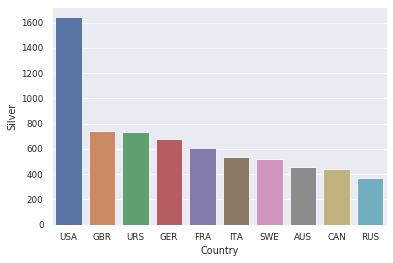

In [173]:
medal_count_df.sort_values("Silver", axis = 0, ascending = False, inplace = True)
sns.barplot(x = "Country", y = "Silver", data = medal_count_df.head(10));

In [174]:
max_gold_index = medal_count_df["Bronze"].idxmax()
print("Country with max Bronze  - ", medal_count_df.loc[max_gold_index]["Country"])
print("Number of Bronze medals won - ", medal_count_df.loc[max_gold_index]["Bronze"])

Country with max Bronze  -  USA
Number of Bronze medals won -  1358


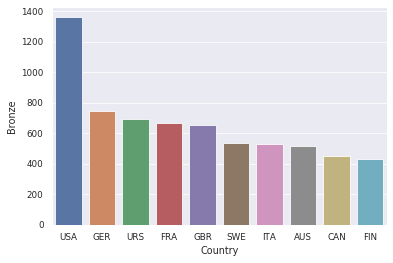

In [175]:
medal_count_df.sort_values("Bronze", axis = 0, ascending = False, inplace = True)
sns.barplot(x = "Country", y = "Bronze", data = medal_count_df.head(10));

In [177]:
max_gold_index = medal_count_df["Total"].idxmax()
print("Country with max number of medals  - ", medal_count_df.loc[max_gold_index]["Country"])
print("Number of  medals won - ", medal_count_df.loc[max_gold_index]["Total"])

Country with max number of medals  -  USA
Number of  medals won -  5637


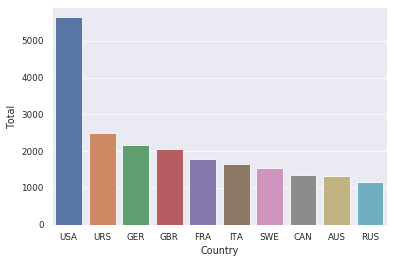

In [178]:
medal_count_df.sort_values("Total", axis = 0, ascending = False, inplace = True)
sns.barplot(x = "Country", y = "Total", data = medal_count_df.head(10));

## How many countries never won a medal in Olympics ?
We need to get the list of countries which never won a gold, silver or bronze in olympic history

In [182]:
never_won_any_medal = medal_count_df[medal_count_df["Total"] == 0]
print("Total number of countries which never won any olympic medal is ", len(never_won_any_medal))
print("List of those countries - ")
print(never_won_any_medal["Country"].tolist())

Total number of countries which never won any olympic medal is  81
List of those countries - 
['YAR', 'CGO', 'SOL', 'GUI', 'SOM', 'SMR', 'BUR', 'BAN', 'CAY', 'GBS', 'BIH', 'OMA', 'CHA', 'ANG', 'NCA', 'SKN', 'VIN', 'TKM', 'LBR', 'PLW', 'HON', 'ASA', 'SAM', 'RWA', 'DMA', 'SEY', 'MLT', 'BIZ', 'YMD', 'SLE', 'YEM', 'MTN', 'VAN', 'GUM', 'SWZ', 'CAM', 'COK', 'CRT', 'GAM', 'ALB', 'SSD', 'NFL', 'TUV', 'UNK', 'KIR', 'MHL', 'BHU', 'BEN', 'NRU', 'ARU', 'NBO', 'MAW', 'MAL', 'MAD', 'CAF', 'ROT', 'LAO', 'FSM', 'MLI', 'BOL', 'SAA', 'ESA', 'LBA', 'MDV', 'PLE', 'COM', 'TLS', 'COD', 'PNG', 'CPV', 'GEQ', 'BRU', 'IVB', 'STP', 'RHO', 'VNM', 'MYA', 'LCA', 'ANT', 'AND', 'LES']


## How many countries never won a Gold medal in Olympics ?

In [183]:
never_won_any_medal = medal_count_df[medal_count_df["Gold"] == 0]
print("Total number of countries which never won a Gold olympic medal is ", len(never_won_any_medal))
print("List of those countries - ")
print(never_won_any_medal["Country"].tolist())

Total number of countries which never won a Gold olympic medal is  121
List of those countries - 
['GHA', 'PAR', 'ISL', 'MAS', 'MNE', 'BOH', 'PHI', 'MDA', 'KSA', 'WIF', 'QAT', 'NAM', 'LIB', 'KGZ', 'ZAM', 'SRI', 'UAR', 'NIG', 'KUW', 'AFG', 'TAN', 'BOT', 'CYP', 'GAB', 'SUD', 'AHO', 'TGA', 'GUA', 'SEN', 'ISV', 'MON', 'MRI', 'MKD', 'ERI', 'BAR', 'DJI', 'TOG', 'GUY', 'IRQ', 'BER', 'YAR', 'CGO', 'SOL', 'GUI', 'SOM', 'SMR', 'BUR', 'BAN', 'CAY', 'GBS', 'BIH', 'OMA', 'CHA', 'ANG', 'NCA', 'SKN', 'VIN', 'TKM', 'LBR', 'PLW', 'HON', 'ASA', 'SAM', 'RWA', 'DMA', 'SEY', 'MLT', 'BIZ', 'YMD', 'SLE', 'YEM', 'MTN', 'VAN', 'GUM', 'SWZ', 'CAM', 'COK', 'CRT', 'GAM', 'ALB', 'SSD', 'NFL', 'TUV', 'UNK', 'KIR', 'MHL', 'BHU', 'BEN', 'NRU', 'ARU', 'NBO', 'MAW', 'MAL', 'MAD', 'CAF', 'ROT', 'LAO', 'FSM', 'MLI', 'BOL', 'SAA', 'ESA', 'LBA', 'MDV', 'PLE', 'COM', 'TLS', 'COD', 'PNG', 'CPV', 'GEQ', 'BRU', 'IVB', 'STP', 'RHO', 'VNM', 'MYA', 'LCA', 'ANT', 'AND', 'LES']


In [184]:
never_won_any_medal = medal_count_df[medal_count_df["Silver"] == 0]
print("Total number of countries which never won a Silver olympic medal is ", len(never_won_any_medal))
print("List of those countries - ")
print(never_won_any_medal["Country"].tolist())

Total number of countries which never won a Gold olympic medal is  102
List of those countries - 
['FIJ', 'WIF', 'PAN', 'MOZ', 'UAE', 'SUR', 'KUW', 'AFG', 'MON', 'MRI', 'MKD', 'ERI', 'BAR', 'DJI', 'TOG', 'GUY', 'IRQ', 'NEP', 'JOR', 'KOS', 'BER', 'YAR', 'CGO', 'SOL', 'GUI', 'SOM', 'SMR', 'BUR', 'BAN', 'CAY', 'GBS', 'BIH', 'OMA', 'CHA', 'ANG', 'NCA', 'SKN', 'VIN', 'TKM', 'LBR', 'PLW', 'HON', 'ASA', 'SAM', 'RWA', 'DMA', 'SEY', 'MLT', 'BIZ', 'YMD', 'SLE', 'YEM', 'MTN', 'VAN', 'GUM', 'SWZ', 'CAM', 'COK', 'CRT', 'GAM', 'ALB', 'SSD', 'NFL', 'TUV', 'UNK', 'KIR', 'MHL', 'BHU', 'BEN', 'NRU', 'ARU', 'NBO', 'MAW', 'MAL', 'MAD', 'CAF', 'ROT', 'LAO', 'FSM', 'MLI', 'BOL', 'SAA', 'ESA', 'LBA', 'MDV', 'PLE', 'COM', 'TLS', 'COD', 'PNG', 'CPV', 'GEQ', 'BRU', 'IVB', 'STP', 'RHO', 'VNM', 'MYA', 'LCA', 'ANT', 'AND', 'LES']


In [186]:
never_won_any_medal = medal_count_df[medal_count_df["Bronze"] == 0]
print("Total number of countries which never won a Bronze olympic medal is ", len(never_won_any_medal))
print("List of those countries - ")
print(never_won_any_medal["Country"].tolist())

Total number of countries which never won a Bronze olympic medal is  105
List of those countries - 
['PAR', 'PER', 'MNE', 'FIJ', 'LUX', 'NAM', 'VIE', 'SRI', 'BDI', 'ECU', 'GRN', 'TAN', 'BOT', 'CYP', 'GAB', 'SUD', 'AHO', 'TGA', 'GUA', 'SEN', 'ISV', 'NEP', 'JOR', 'KOS', 'YAR', 'CGO', 'SOL', 'GUI', 'SOM', 'SMR', 'BUR', 'BAN', 'CAY', 'GBS', 'BIH', 'OMA', 'CHA', 'ANG', 'NCA', 'SKN', 'VIN', 'TKM', 'LBR', 'PLW', 'HON', 'ASA', 'SAM', 'RWA', 'DMA', 'SEY', 'MLT', 'BIZ', 'YMD', 'SLE', 'YEM', 'MTN', 'VAN', 'GUM', 'SWZ', 'CAM', 'COK', 'CRT', 'GAM', 'ALB', 'SSD', 'NFL', 'TUV', 'UNK', 'KIR', 'MHL', 'BHU', 'BEN', 'NRU', 'ARU', 'NBO', 'MAW', 'MAL', 'MAD', 'CAF', 'ROT', 'LAO', 'FSM', 'MLI', 'BOL', 'SAA', 'ESA', 'LBA', 'MDV', 'PLE', 'COM', 'TLS', 'COD', 'PNG', 'CPV', 'GEQ', 'BRU', 'IVB', 'STP', 'RHO', 'VNM', 'MYA', 'LCA', 'ANT', 'AND', 'LES']


In [197]:
medal_count_df["Total"]


,Country,Gold,Silver,Bronze
3,USA,2638,1641,1358
27,URS,1082,732,689
40,GER,745,674,746
87,GBR,678,739,651
8,FRA,501,610,666
...,...,...,...,...
191,AND,0,0,0
49,LBA,0,0,0
203,STP,0,0,0
228,SSD,0,0,0


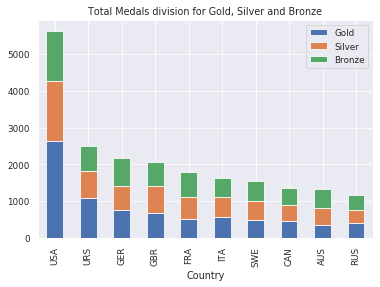

In [202]:
medal_count_df.sort_values("Total", axis = 0, ascending = False, inplace = True)
temp_medal_df = medal_count_df.drop(["Total"], axis = 1)
temp_medal_df.head(10).plot(x = 'Country', kind='bar', stacked=True, title='Total Medals division for Gold, Silver and Bronze');

#Summary 

Let us summarize our statistics here in this table - 

|S.No.|Question asked|Answer|
|----|--|---|
|1|Number of male atheletes appeared in the Olympics ?| 196,594 |
|2|Number of female atheletes appeared in the Olympics ?|74,522|
|3|Minimum age of an athelete who participated in Olympics history ?| 10 years|
|4|Maximum age of an athelete who participated in Olympics history ?| 97 years|
|5|Mimimum weight of an athelete who participated in Olympics history ?|25 KG|
|6|Maximum weight of an athelete who participated in Olympics history ?|214 KG|
|7|Which athelete appeared for most number of times in Olympics history ?| Robert Tait McKenzie for 58 times |
|8|Which country won most number of gold medals in the history of olympics ?|United States won 2638 gold models|
|9|Which country won most number of silver medals in the history of olympics ?|United States won 1641 silver medals|
|10|Which country won most number of bronze medals in the history of olympics ?|United states won 1358 bronze medals|
|11|Which country won most number of medals in the history of olympics ?|United states won 5637 medals in total|
|12|How many countries never won any medals in olympic ?|81 countries never won any medal|
|13|How many countries never won any gold medal in olympics ?|121 countries never won a gold medal|
|14|How many countries never won any silver medal in olympics ?|102 countries never won a silver medal|
|15|How many countries never won any bronze medal in olympics ?|105 countries never won a bronze medal|

In [200]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aaryaashay1848/data-analysis-120-years-of-olympic


'https://jovian.ai/aaryaashay1848/data-analysis-120-years-of-olympic'